## Missing Values- Feature Engineering

Lifecycle of a Data Science Projects
1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?

1. ##### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df=pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/Krish/titanic.csv")

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# MCAR
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. ##### Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [15]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [17]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### Missing At Random(MAR)

Men---hide their salary
Women---hide their age

### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


#### Mean/ MEdian /Mode imputation
When should we apply?
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [19]:
df1 = df[["Age" , "Fare" , "Survived"]]
df1

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [20]:
## Lets go and see the percentage of missing values
df1.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [21]:
def impute_nan(df1,variable,median):
    df1[variable+"_median"]=df1[variable].fillna(median)

In [22]:
median=df1.Age.median()
median

28.0

In [23]:
impute_nan(df1,'Age',median)
df1.head()

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_21612\4119287170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[variable+"_median"]=df1[variable].fillna(median)


,Age,Fare,Survived,Age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [24]:
mean = df1["Age"].mean()
mean

29.69911764705882

In [25]:
def imputed_nan_mean(df1 , variable , mean):
    df1[variable+"_mean"] = df1[variable].fillna(mean) 

In [26]:
imputed_nan_mean(df1 , "Age" , mean)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_21612\1641070569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[variable+"_mean"] = df1[variable].fillna(mean)


In [27]:
df1.head()

,Age,Fare,Survived,Age_median,Age_mean
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0


In [28]:
print(df1['Age'].std())
print(df1['Age_median'].std())
print(df1["Age_mean"].std())

14.526497332334044
13.019696550973194
13.002015226002884


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

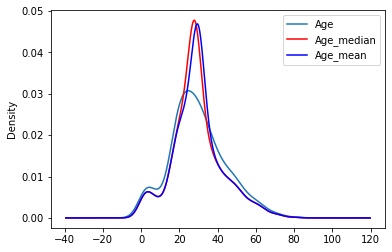

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax)
df1.Age_median.plot(kind='kde', ax=ax, color='red')
df1.Age_mean.plot(kind='kde', ax=ax, color='blue')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation


####  Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [31]:
df1.isnull().sum()

Age           177
Fare            0
Survived        0
Age_median      0
Age_mean        0
dtype: int64

In [32]:
df1["Age"].count()

714

In [33]:
df1["Age"].isnull().sum()

177

In [157]:
df1["again_Age_RanImput"] = df1["Age"]
random_smple = df1["Age"].dropna().sample(df1["Age"].isnull().sum() , random_state = 1)
random_sample.index = df1[df1["Age"].isnull()].index
df1.loc[df1["Age"].isnull() ,"again_Age_RanImput" ] = random_sample

In [159]:
df1.head()

,Age,Fare,Survived,Age_median,Age_mean,Age_RanImput,again_Age_RanImput
0,22.0,7.2500,0,22.0,22.0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0,38.0,38.0
2,26.0,7.9250,1,26.0,26.0,26.0,26.0
3,35.0,53.1000,1,35.0,35.0,35.0,35.0
4,35.0,8.0500,0,35.0,35.0,35.0,35.0


In [34]:
df1["Age_RanImput"] = df1["Age"]
##It will have the random sample to fill the na
random_sample = df1["Age"].dropna().sample(df1["Age"].isnull().sum() , random_state = 0)
#pandas need to have same index in order to merge the dataset
random_sample.index = df1[df1["Age"].isnull()].index
df1.loc[df1["Age"].isnull() , "Age_RanImput"] = random_sample 

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_21612\2868226328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age_RanImput"] = df1["Age"]


In [35]:
 df1

,Age,Fare,Survived,Age_median,Age_mean,Age_RanImput
0,22.0,7.2500,0,22.0,22.000000,22.0
1,38.0,71.2833,1,38.0,38.000000,38.0
2,26.0,7.9250,1,26.0,26.000000,26.0
3,35.0,53.1000,1,35.0,35.000000,35.0
4,35.0,8.0500,0,35.0,35.000000,35.0
...,...,...,...,...,...,...
886,27.0,13.0000,0,27.0,27.000000,27.0
887,19.0,30.0000,1,19.0,19.000000,19.0
888,NaN,23.4500,0,28.0,29.699118,15.0
889,26.0,30.0000,1,26.0,26.000000,26.0


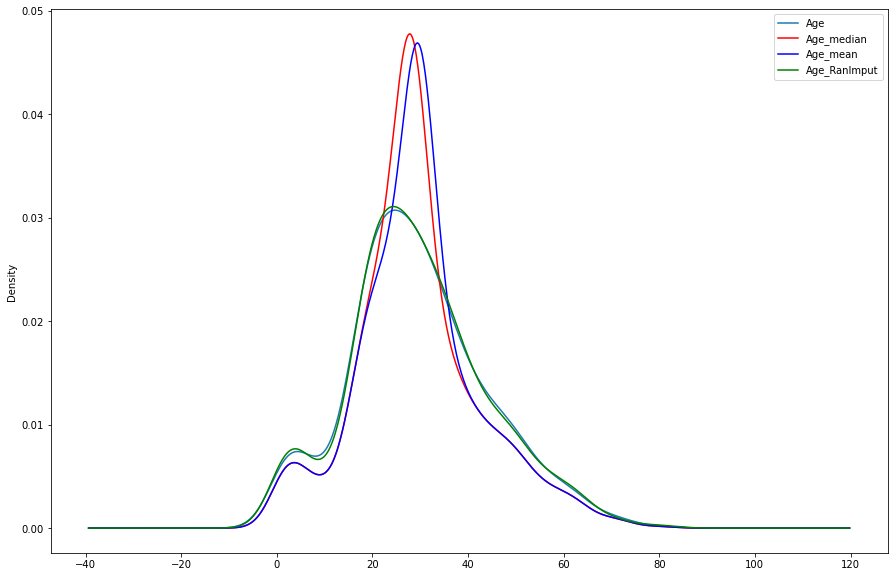

In [36]:
fig = plt.figure(figsize = (15 , 10))
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax)
df1.Age_median.plot(kind='kde', ax=ax, color='red')
df1.Age_mean.plot(kind='kde', ax=ax, color='blue')
df1.Age_RanImput.plot(kind='kde', ax=ax, color='green')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [38]:
# df1['Age'].apply(lambda x: x = df['Age'].dropna().sample() if x==NaN)

### Advantages¶

Easy To implement

There is less distortion in variance

### Disadvantage

Every situation randomness wont work



It works well if the data are not missing completely at random

## Capturing NAN values with a new feature

it work well if the data not missing at completely random

Capturing NAN values with a new feature

In [39]:
df2 = df1[["Age" , "Fare" , "Survived"]]
df2["Age_nan"] = np.where(df2["Age"].isnull() , 1 , 0)
df2["Age"].fillna(df2["Age"].median() , inplace = True)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_21612\649418161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age_nan"] = np.where(df2["Age"].isnull() , 1 , 0)
C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_21612\649418161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age"].fillna(df2["Age"].median() , inplace = True)


In [40]:
df2.head()

,Age,Fare,Survived,Age_nan
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


#### End of Distribution imputation

In [41]:
df3 = df1[["Age" , "Fare" , "Survived"]]

<AxesSubplot:xlabel='Age', ylabel='Count'>

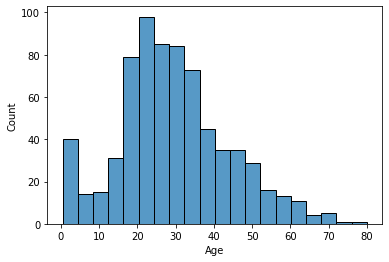

In [42]:
sns.histplot(data = df3 , x = "Age")

In [43]:
extreme = df3["Age"].mean()+df3["Age"].std()*3
extreme

73.27860964406095

In [44]:
df3["Age_EOD"] = df3["Age"].fillna(extreme)
df3["Age"] = df3["Age"].fillna(df3["Age"].median())

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_21612\1810261538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Age_EOD"] = df3["Age"].fillna(extreme)
C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_21612\1810261538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Age"] = df3["Age"].fillna(df3["Age"].median())


In [45]:
df3.head(10)

,Age,Fare,Survived,Age_EOD
0,22.0,7.2500,0,22.00000
1,38.0,71.2833,1,38.00000
2,26.0,7.9250,1,26.00000
3,35.0,53.1000,1,35.00000
4,35.0,8.0500,0,35.00000
5,28.0,8.4583,0,73.27861
6,54.0,51.8625,0,54.00000
7,2.0,21.0750,0,2.00000
8,27.0,11.1333,1,27.00000
9,14.0,30.0708,1,14.00000


<AxesSubplot:>

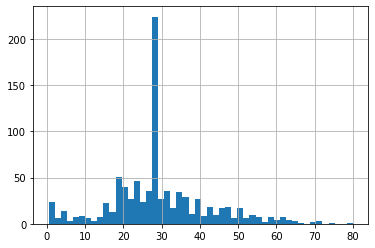

In [46]:
df3["Age"].hist(bins = 50)

<AxesSubplot:>

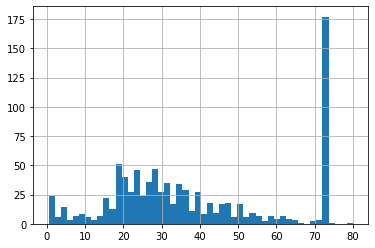

In [47]:
df3["Age_EOD"].hist(bins = 50)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_EOD'>

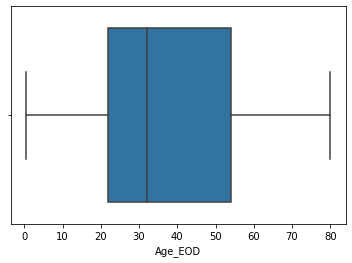

In [48]:
sns.boxplot(df3["Age_EOD"])

#### Arbitary value imputition

this technique drive from kaggle computation

it consist a nan with an arbitary value

In [49]:
data = pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/Krish/titanic.csv" , usecols = ["Age" , "Fare" , "Survived"])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [224]:
data["Age"].value_counts().index[0]

24.0

In [252]:
data["Age"].mode()[0]

24.0

Handel Categorical missing value

Frequent Category imputation

In [50]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/train.csv" , usecols = ["BsmtQual",'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [51]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [52]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [53]:
df["BsmtQual"].value_counts().index[0]

'TA'

In [54]:
def impute_nan(df , variable):
    most_frequant_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequant_category , inplace = True)

In [55]:
for c in df.columns:
    impute_nan(df , c)
    


In [56]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Adding A variable to capture null

In [57]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/train.csv" , usecols = ["BsmtQual",'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [58]:
df["BsmtQual_var"] = np.where(df["BsmtQual"].isnull() , 1 , 0)

In [59]:
df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

In [60]:
# df[df["BsmtQual_var"]==1]
df["FireplaceQu_var"] = np.where(df["FireplaceQu"].isnull() , 1 , 0)
df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])

In [61]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


Suppose you have more frequent categories, we just replace nan with new category

In [62]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/train.csv" , usecols = ["BsmtQual",'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [63]:
def imputed_nan(df,variable):
    df[variable+"var"]=np.where(df[variable].isnull() , "missing" , df[variable])
    

In [64]:
for c in df.columns:
    imputed_nan(df,c)
    

In [65]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualvar,FireplaceQuvar,GarageTypevar,SalePricevar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [66]:
df = df.drop(["BsmtQual" , "FireplaceQu" , "GarageType" , "SalePrice"] , axis = 1)
df

,BsmtQualvar,FireplaceQuvar,GarageTypevar,SalePricevar
0,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,missing,Attchd,142125


Handling Catgorical Feature

In [67]:
df=pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/Krish/titanic.csv" , usecols = ["Sex"])
df.head()


,Sex
0,male
1,female
2,female
3,female
4,male


One hot Encoding

In [68]:
pd.get_dummies(data = df, columns = ["Sex"] , drop_first = True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [69]:
df=pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/Krish/titanic.csv" , usecols = ["Embarked"])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [70]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [71]:
df.dropna(inplace = True)

In [72]:
pd.get_dummies(data = df , columns = ["Embarked"] ,drop_first = True ).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [73]:
df = pd.read_csv("Mercedes.csv" , usecols = ["X0" , "X1" , "X2" , "X3" , 'X4' , 'X5' , 'X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [74]:
list_10 = list(df["X0"].value_counts().sort_values(ascending = False).head(10).index)

In [75]:
list_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [76]:
for i in list_10:
    df[i] = np.where(df["X0"]==i , 1 , 0)
    

In [77]:
list_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [78]:
df.head(20)

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
5,t,b,e,c,d,g,h,0,0,0,0,1,0,0,0,0,0
6,al,r,e,f,d,f,h,0,0,0,0,0,0,0,0,0,0
7,o,l,as,f,d,f,j,0,0,0,0,0,0,1,0,0,0
8,w,s,as,e,d,f,i,0,0,0,0,0,0,0,0,0,1
9,j,b,aq,c,d,f,a,0,0,0,0,0,0,0,0,0,0


In [79]:
for i in df.columns:
    print(df[i].nunique())

47
27
44
7
4
29
12
2
2
2
2
2
2
2
2
2
2


In [82]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

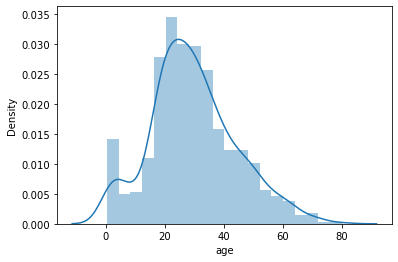

In [84]:
sns.distplot(titanic["age"].dropna())

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

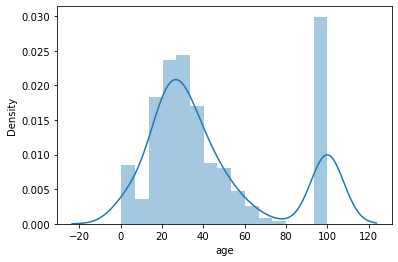

In [85]:
sns.distplot(titanic["age"].fillna(100))

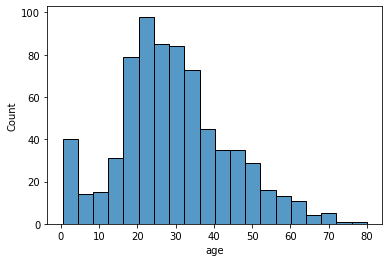

In [87]:
sns.histplot(data = titanic , x = "age")
plt.show()

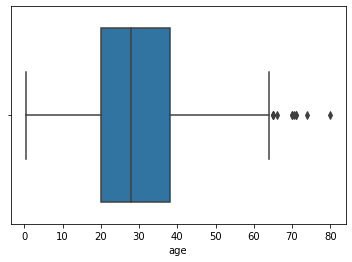

In [91]:
sns.boxplot(x = titanic["age"])
plt.show()

In [93]:
titanic["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Assuming Age follow a gaussian distribution , we will calculate boundries which differentiate the outliers

In [96]:
upper_boundry = titanic["age"].mean()+titanic["age"].std()*3
upper_boundry

73.27860964406095

In [97]:
lower_boundry = titanic["age"].mean()-titanic["age"].std()*3
lower_boundry

-13.88037434994331

In [261]:
print(upper_boundry)
print(lower_boundry)
print(titanic["age"].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


In [275]:
data = titanic.copy()
data.loc[data["age"]>=73,"age"] = 73

In [277]:
data[data["age"]==73]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,73.0,0,0,30.000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,73.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True


In [278]:
titanic[titanic["age"]==73]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


IQR

In [264]:
IQR = titanic["age"].quantile(0.75)-titanic["age"].quantile(0.25)
upper_boundry = titanic["age"].quantile(0.75)+1.5*IQR
lower_boundry = titanic["age"].quantile(0.25)-1.5*IQR
print(upper_boundry)
print(lower_boundry)


64.8125
-6.6875


#### Featured are skewed

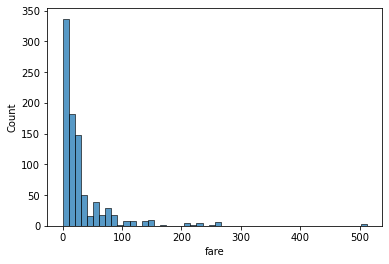

In [268]:
sns.histplot(data = titanic , x = "fare" , bins = 50)
plt.show()

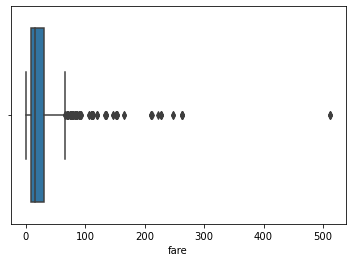

In [270]:
sns.boxplot(x = titanic["fare"])
plt.show()

In [271]:
titanic["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [272]:
IQR = titanic["fare"].quantile(0.75)-titanic["fare"].quantile(0.25)
upper_boundry = titanic["fare"].quantile(0.75)+1.5*IQR
lower_boundry = titanic["fare"].quantile(0.25)-1.5*IQR
print(upper_boundry)
print(lower_boundry)

65.6344
-26.724


In [274]:
# Extreme outlier
IQR = titanic["fare"].quantile(0.75)-titanic["fare"].quantile(0.25)
upper_boundry = titanic["fare"].quantile(0.75)+3*IQR
lower_boundry = titanic["fare"].quantile(0.25)-3*IQR
print(upper_boundry)
print(lower_boundry)

100.2688
-61.358399999999996


In [279]:
data.loc[data["fare"]>=100,"fare"] = 100

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

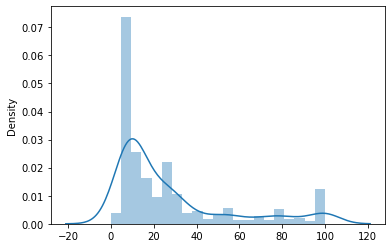

In [281]:
sns.distplot(x = data["fare"])

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

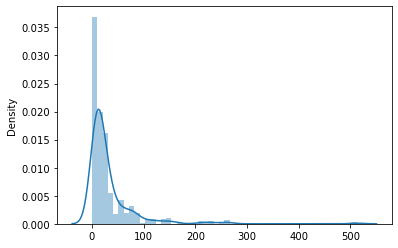

In [282]:
sns.distplot(x = titanic["fare"])

In [253]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


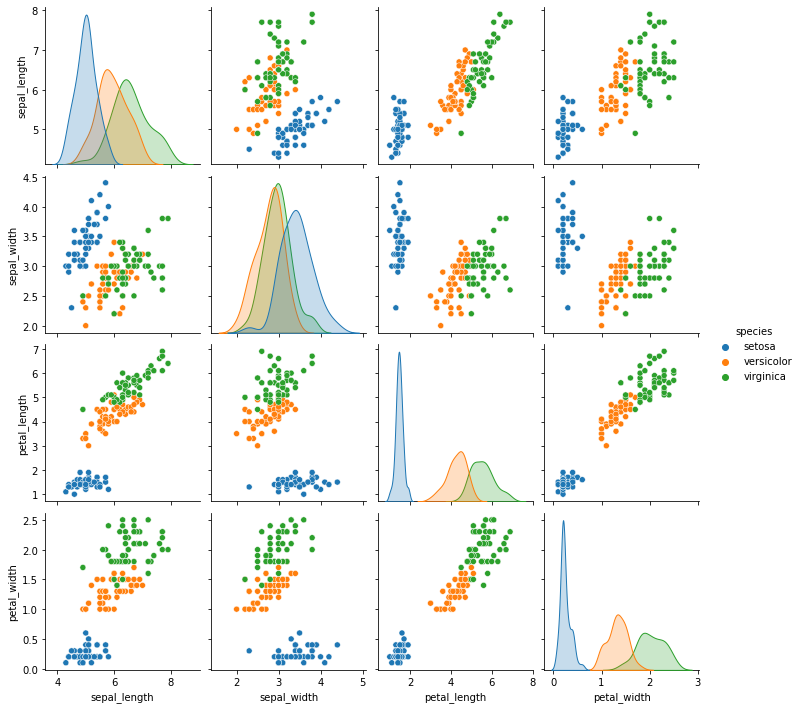

In [257]:
sns.pairplot(data = iris , diag_kind = "kde" , hue = "species")

In [258]:
X = iris.drop("species" , axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [260]:
Y = iris[["species"]]
Y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica
